In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, RK45, DOP853

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = \delta xy - \gamma y$$

In [25]:
def _lotka_volterra(t, state, alpha, beta, delta, gamma):
    # expecting 2-dim list
    if len(state) != 2:
        raise Exception("Expected 2-dimensional initial state: [x, y]")

    x = state[0]
    y = state[1]

    # dx/dt
    dx = (alpha*x) - (beta*x*y)
    # dy/dt
    dy = (delta*x*y) - (gamma*y)

    return [dx, dy]


class LotkaVolterra():
    """
    The basic Lotka-Volterra model.
    """
    def __init__(self, init_state, alpha, beta, delta, gamma):
        self.init_state = init_state
        self.alpha = alpha
        self.beta = beta
        self.delta = delta
        self.gamma = gamma

    def solve(self, t_start, t_end):
        solution = solve_ivp(
            _lotka_volterra, 
            t_span=[t_start, t_end],
            y0=self.init_state,
            args=(self.alpha, self.beta, self.delta, self.gamma),
            dense_output=True,
            method=DOP853
        )
        return solution


model = LotkaVolterra([10, 5], 1.5, 1, 1, 3)
solution = model.solve(0, 20)

t = np.linspace(0, 20, 400)
state_values = solution.sol(t)
state_values.shape


(2, 400)

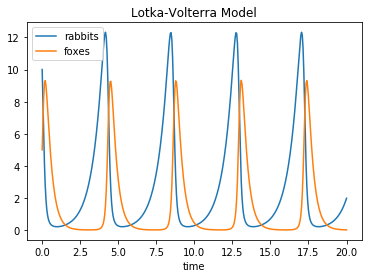

In [32]:
plt.plot(t, np.transpose(state_values))
plt.xlabel("time")
plt.legend(["rabbits", "foxes"])
plt.title("Lotka-Volterra Model")
plt.show()

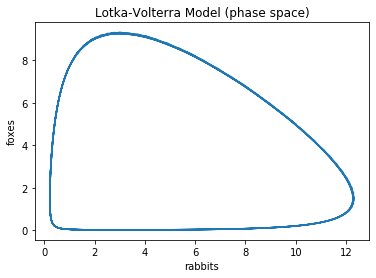

In [31]:
plt.plot(state_values[0], state_values[1])
plt.xlabel("rabbits")
plt.ylabel("foxes")
# plt.legend()
plt.title("Lotka-Volterra Model (phase space)")
plt.show()